## Measurement of Electricity Prices of a District given the total amount of Electricity using time series forecasting

### Data Set Information:

The archive contains 92,016 measurements of electricity data gathered between September 2010 and February 2021.

[Dataset](https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast)

### Load the Dataset

In [186]:
import pandas as pd

In [187]:
elect_data = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [188]:
elect_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


### Summary Statistics 

In [189]:
elect_data.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


### Exploratory Data Analysis

1. Check for Missing data

In [190]:
elect_data.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

No missing data

2. Type of Data

In [191]:
elect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


Mostly Numerical Data

3. Early Visualizations to gain Insights

In [192]:
from matplotlib import pyplot
import datetime




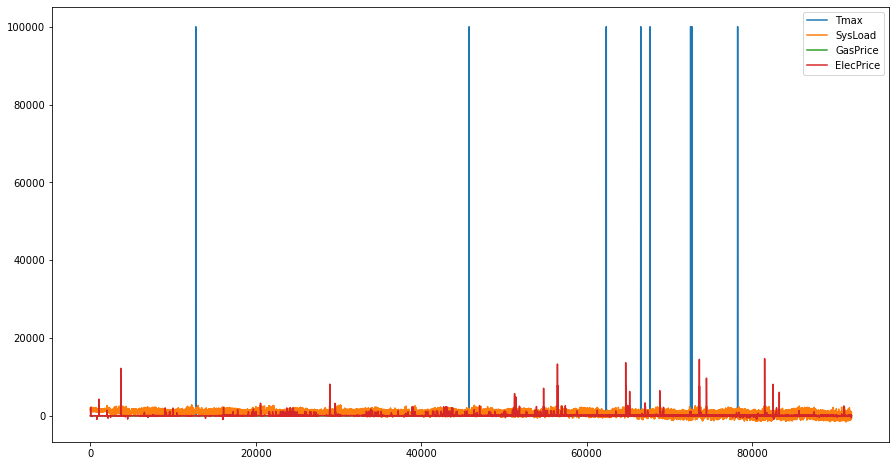

In [193]:
elect_data.plot()
pyplot.show()

automatically binned histogram

### Data Preparation

1. Convert the Fulltime column to a DateTime value

In [194]:
elect_data["FullDate"] = pd.to_datetime(elect_data["FullDate"])

Let's check the datatype

In [195]:
elect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


2. Make FullDate the index

In [196]:
elect_data.set_index("FullDate", inplace=True)

In [197]:
elect_data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


### Insights from the Data


1. ElecPrice

In [198]:
elect_data["ElecPrice"].max()

14700.0

Calculating Moving average

Text(0, 0.5, 'ElecPrice')

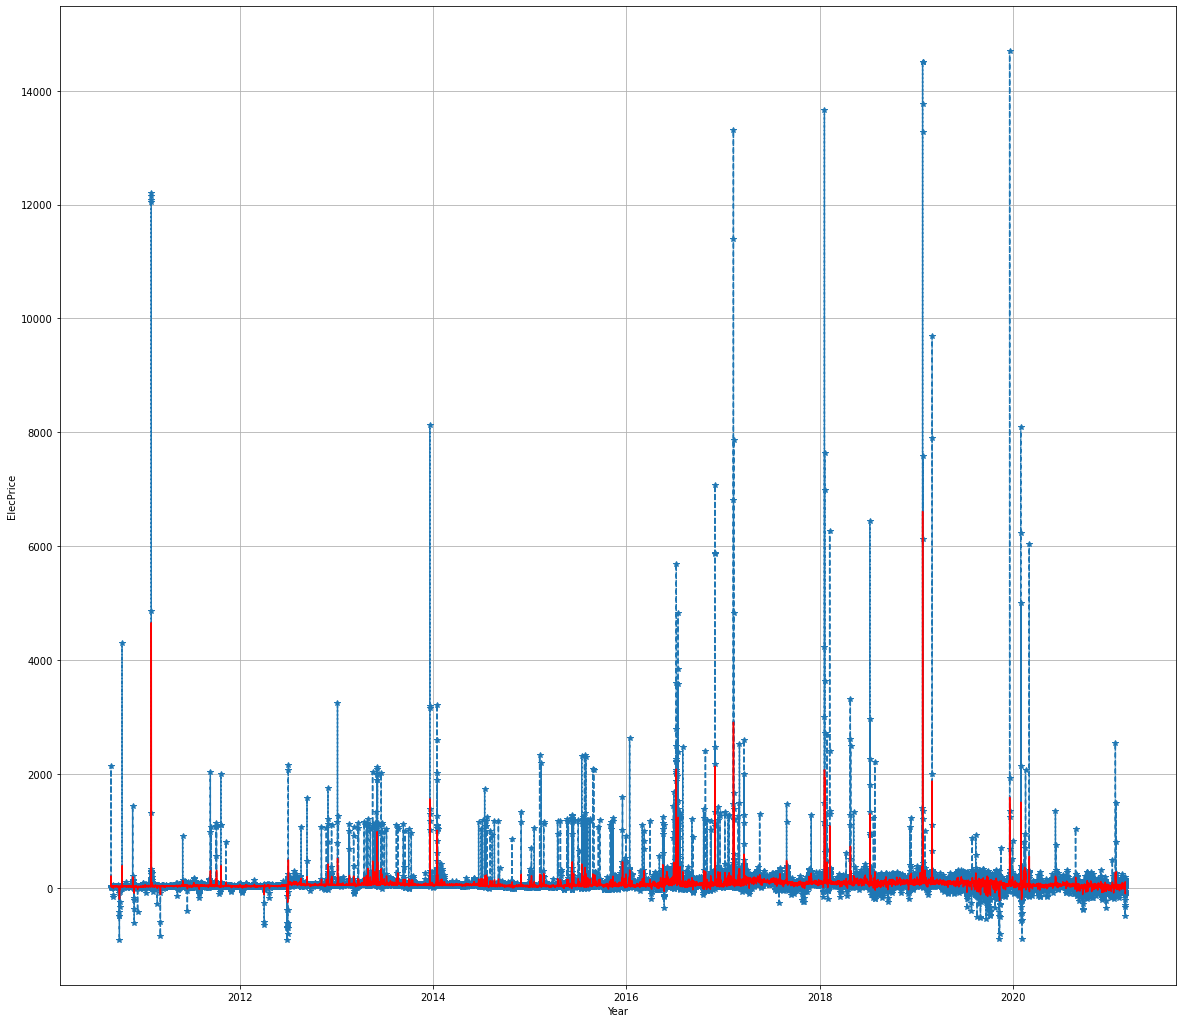

In [199]:
import matplotlib.pyplot as plt

MA = elect_data['ElecPrice'].rolling(12).mean()
plt.figure(figsize=(20,18))
plt.plot(elect_data.index, elect_data.ElecPrice, '--', marker='*' )
plt.plot(MA, color='red')
plt.grid()
plt.xlabel('Year')
plt.ylabel('ElecPrice')

We'll use statsmodels to extract relevant timeseries information from the data

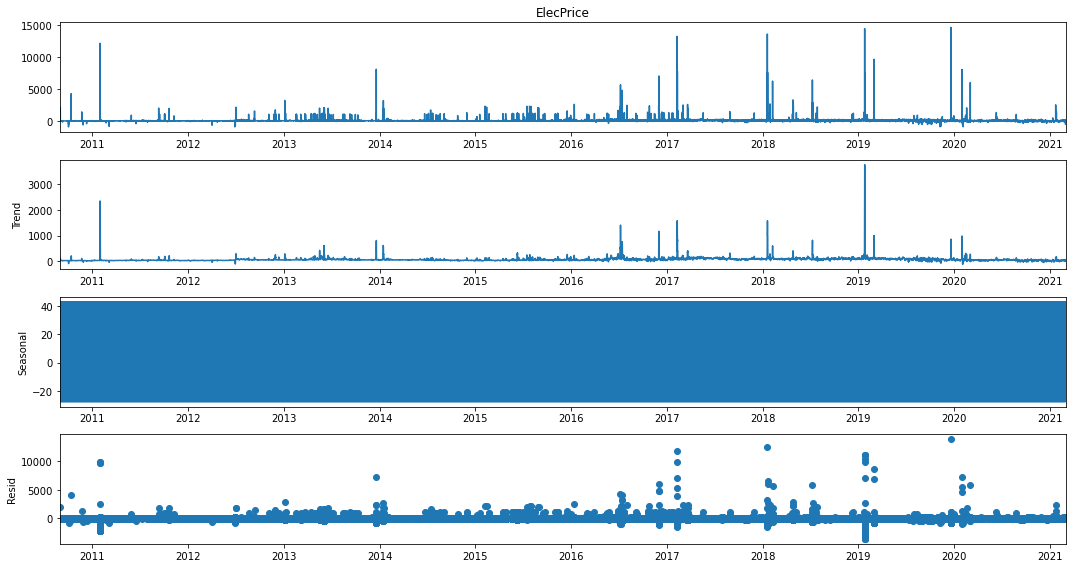

In [200]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8

decompose_series = sm.tsa.seasonal_decompose(elect_data['ElecPrice'], model='additive')
decompose_series.plot()
plt.show()

### Solutions to Questions

#### Question 11: 
Resample the data from an hour samplinng rate to a daily sampling rate (i.e sum over the hours for each day).  Which of the following is a plot of ElecPrice over time?

(The options are not shown here but the answer will be obtained)

In [201]:
#This is a downsampling

#Daily downsampling
daily_elect_data = elect_data.resample('D').sum()


#Quarterly Downsampling
quarterly_elect_data = elect_data.resample('3M').sum()

Let's view them

In [202]:
daily_elect_data.head(3)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38,88.56,2751.700
2010-09-02,369.6,38898.99,88.56,570.810
2010-09-03,439.2,41665.76,106.80,504.975


In [203]:
quarterly_elect_data.head(3)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-30,12172.8,1.136265e+06,2576.6376,18054.645
2010-12-31,53280.0,2.914292e+06,5541.6528,45872.860
2011-03-31,60626.4,2.622655e+06,7338.4752,113511.665


Finally, we display the downsample data

Text(0, 0.5, 'Electric Price')

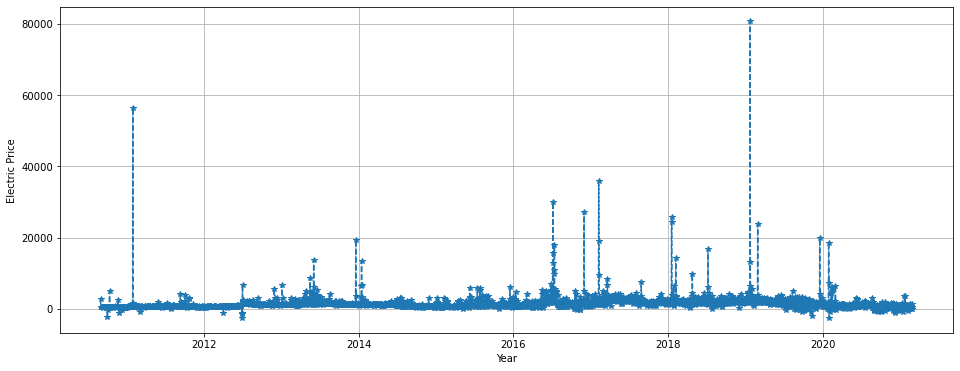

In [204]:
plt.figure(figsize=(16,6))
plt.plot(daily_elect_data.index, daily_elect_data['ElecPrice'],'--',marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Electric Price')

#### Question 12:

Using the Augmented Dicky Fuller Test (ADF), what is the P-value of the SysLoad and GasPrice of the sampled Dataset, to 6 decimal places?

We'll define a helper function to display the information of ADF test



In [205]:
def show_adf_test(adfull):
    """
    Displays the Augmented Dicky Fuller Test results ie.
    ADF Statistic,p-value, No. of lags used,
    No. of observations used and Critical Values
    """
    print(f'ADF Statistic: {adfull[0]}')
    print(f'p-value: {adfull[1]}')
    print(f'No. of lags used: {adfull[2]}')
    print(f'No. of observations used : {adfull[3]}')
    print('Critical Values:')
    for k, v in adfull[4].items():
        print(f' {k}: {v}')
    

In [206]:
from statsmodels.tsa.stattools import adfuller
sys_adf_result = adfuller(daily_elect_data['SysLoad'])
gas_adf_result = adfuller(daily_elect_data['GasPrice'])
elec_adf_result = adfuller(daily_elect_data['ElecPrice'])

In [207]:
show_adf_test(sys_adf_result)

ADF Statistic: -3.6901589888366484
p-value: 0.0042537255045740855
No. of lags used: 30
No. of observations used : 3803
Critical Values:
 1%: -3.432070672988693
 5%: -2.8623002987378547
 10%: -2.567174716967499


In [208]:
sys_adf = sys_adf_result[1]
round(sys_adf,6)

0.004254

In [209]:
show_adf_test(gas_adf_result)

ADF Statistic: -2.902766697165178
p-value: 0.04502721288462563
No. of lags used: 27
No. of observations used : 3806
Critical Values:
 1%: -3.4320693157877544
 5%: -2.8622996992165364
 10%: -2.5671743978048323


In [210]:
gas_adf = gas_adf_result[1]
round(gas_adf,6)

0.045027

In [211]:
show_adf_test(elec_adf_result)

ADF Statistic: -8.269053866873815
p-value: 4.848817773711248e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
 1%: -3.432066157296446
 5%: -2.8622983040036005
 10%: -2.5671736550459663


In [212]:
elect_adf = elec_adf_result[1]
round(elect_adf,6)

0.0

#### Question 13: 

Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of the GasPrice and ElctPrice of the resampled Dataset, to 4 decimal places?

In [213]:
round(gas_adf_result[4]["5%"],4)

-2.8623

In [214]:
round(gas_adf_result[4]["10%"],4)

-2.5672

In [215]:
round(elec_adf_result[4]["5%"],4)

-2.8623

In [216]:
round(elec_adf_result[4]["10%"],4)

-2.5672

### The following answers questions 14-16

Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’)

Splitting the Dataset to train and test set

In [217]:
train_data = daily_elect_data.iloc[:2757,:]
test_data = daily_elect_data.iloc[2757:,:]
train_data.shape

(2757, 4)

In [218]:
test_data.shape

(1077, 4)

In [219]:
train_data.reset_index(inplace = True)
train_data.head(5)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [220]:
train_df = train_data.loc[:,["FullDate","ElecPrice"]]
train_df = train_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
train_df.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [221]:
test_data.reset_index(inplace = True)
test_data.head()
test_df = test_data.iloc[:,[0,-1]]
test_df = test_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
test_df.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


## Model Training

In [222]:
from prophet import Prophet
model = Prophet(daily_seasonality=True)
model.fit(train_df)

forecast_val = model.predict(test_df) 
forecast_val.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,4199.026666,50.561023,4823.629278,4199.026666,4199.026666,-1675.427379,-1675.427379,-1675.427379,-1519.821457,...,9.731678,9.731678,9.731678,-165.337600,-165.337600,-165.337600,0.0,0.0,0.0,2523.599287
1,2018-03-21,4199.802407,317.143610,5138.361078,4199.802407,4199.802407,-1522.931388,-1522.931388,-1522.931388,-1519.821457,...,159.356593,159.356593,159.356593,-162.466525,-162.466525,-162.466525,0.0,0.0,0.0,2676.871018
2,2018-03-22,4200.578147,433.549195,5200.302789,4200.578147,4200.578147,-1424.738648,-1424.738648,-1424.738648,-1519.821457,...,257.114912,257.114912,257.114912,-162.032102,-162.032102,-162.032102,0.0,0.0,0.0,2775.839500
3,2018-03-23,4201.353888,225.386788,4947.046125,4201.353888,4201.353888,-1633.414317,-1633.414317,-1633.414317,-1519.821457,...,50.275296,50.275296,50.275296,-163.868157,-163.868157,-163.868157,0.0,0.0,0.0,2567.939571
4,2018-03-24,4202.129629,-253.924137,4513.696232,4202.129629,4202.129629,-1959.002590,-1959.002590,-1959.002590,-1519.821457,...,-271.449061,-271.449061,-271.449061,-167.732072,-167.732072,-167.732072,0.0,0.0,0.0,2243.127039


#### Question 14:
Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

Hint:
Define a function that calculates the MAPE and pass your dataset into it

In [223]:
import numpy as np

def mape_value(y_true,y_pred):
    """
    Returns the Mean Absolute Percentage Error of a dataset
    """
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [224]:
mape = mape_value(test_df['y'],forecast_val['yhat'])
print("mean absolute percentage error is : ", round(mape,2))

mean absolute percentage error is :  540.8


#### Question 15:

What is the RMSE in 2 decimal places

In [225]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(test_df['y'],forecast_val['yhat']))
print("mean absolute percentage error is : ", round(rmse,2))

mean absolute percentage error is :  3200.29


#### Question 16

If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value

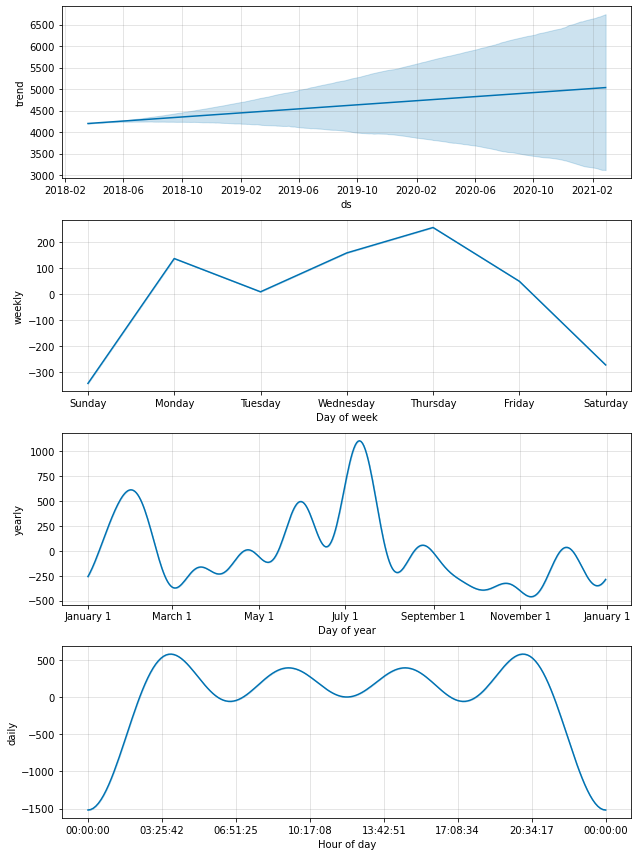

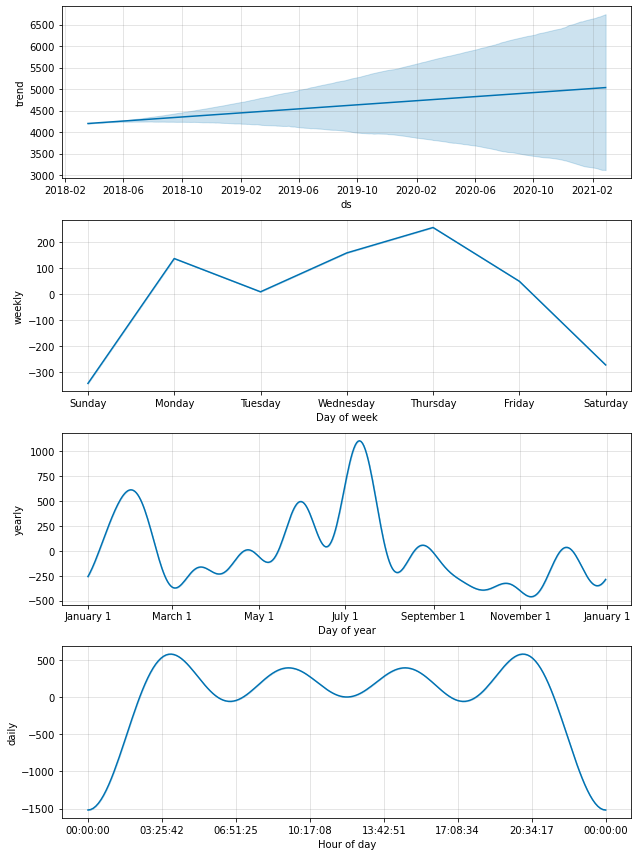

In [226]:
model.plot_components(forecast_val)

July is the Highest

### Further Instructions (17-19)
#### Multivariate Time Series Forecasting with Facebook Prophet
In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] will be [‘add1’, ‘add2’, ‘add3’’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last x-2757 days of ElecPrice. Answer question 17-19:

#### Question 17

Evaluating the results of your times series model on the test set what is the MAPE(in %) in 2 decimal places?

In [227]:
#Lets get back our daily data 
daily_elect_data.reset_index(inplace=True)
daily_elect_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [228]:
##Setting the regression and prediction features for training
daily_elect_data_mod = daily_elect_data.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3','ElecPrice':'y'})
daily_elect_data_mod.head() 

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [229]:
train_data_new = daily_elect_data_mod.iloc[:2757,:]
test_data_new = daily_elect_data_mod.iloc[2757:,:]

model = Prophet(daily_seasonality=True)

model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

In [230]:
model = model.fit(train_data_new)

In [231]:
forecast_values_new = model.predict(test_data_new) 
forecast_values_new.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,3282.354879,-323.758471,4301.334897,3282.354879,3282.354879,-856.348263,-856.348263,-856.348263,0.236909,...,-84.471995,-84.471995,-84.471995,-39.522698,-39.522698,-39.522698,0.0,0.0,0.0,1989.377259
1,2018-03-21,3283.049368,-92.800688,4148.035383,3283.049368,3283.049368,-1026.355400,-1026.355400,-1026.355400,0.234098,...,42.541964,42.541964,42.541964,-30.225522,-30.225522,-30.225522,0.0,0.0,0.0,1980.782986
2,2018-03-22,3283.743857,655.699744,5140.143337,3283.743857,3283.743857,-214.951453,-214.951453,-214.951453,0.220478,...,145.636345,145.636345,145.636345,-25.183861,-25.183861,-25.183861,0.0,0.0,0.0,2901.003845
3,2018-03-23,3284.438346,281.634942,4786.523931,3284.438346,3284.438346,-274.887659,-274.887659,-274.887659,0.212479,...,-44.301841,-44.301841,-44.301841,-24.256467,-24.256467,-24.256467,0.0,0.0,0.0,2585.273253
4,2018-03-24,3285.132835,-841.679739,3563.462147,3285.132835,3285.132835,-1076.398887,-1076.398887,-1076.398887,0.210534,...,-117.564139,-117.564139,-117.564139,-27.192710,-27.192710,-27.192710,0.0,0.0,0.0,1438.551310


In [232]:
mape_new = mape_value(test_data_new['y'],forecast_values_new['yhat'])
print("mean absolute percentage error is : ", round(mape_new,2))

mean absolute percentage error is :  233.4


#### Question 18:
What is the RMSE in 2 Decimal places

In [233]:
from sklearn import metrics
rmse_new = np.sqrt(metrics.mean_squared_error(test_data_new['y'],forecast_values_new['yhat']))
print("Root mean square error is: ", round(rmse_new,2))



Root mean square error is:  2709.25


#### Question 19:

If you plot the components from the multivariate forecasted model, what dat of the daily seasonality has the highest value?

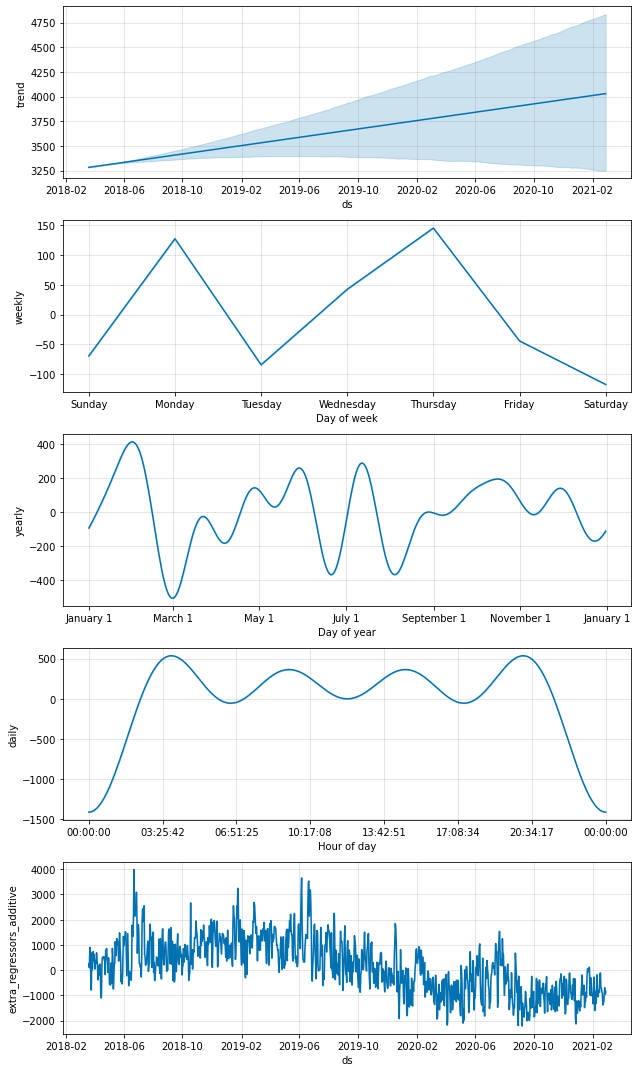

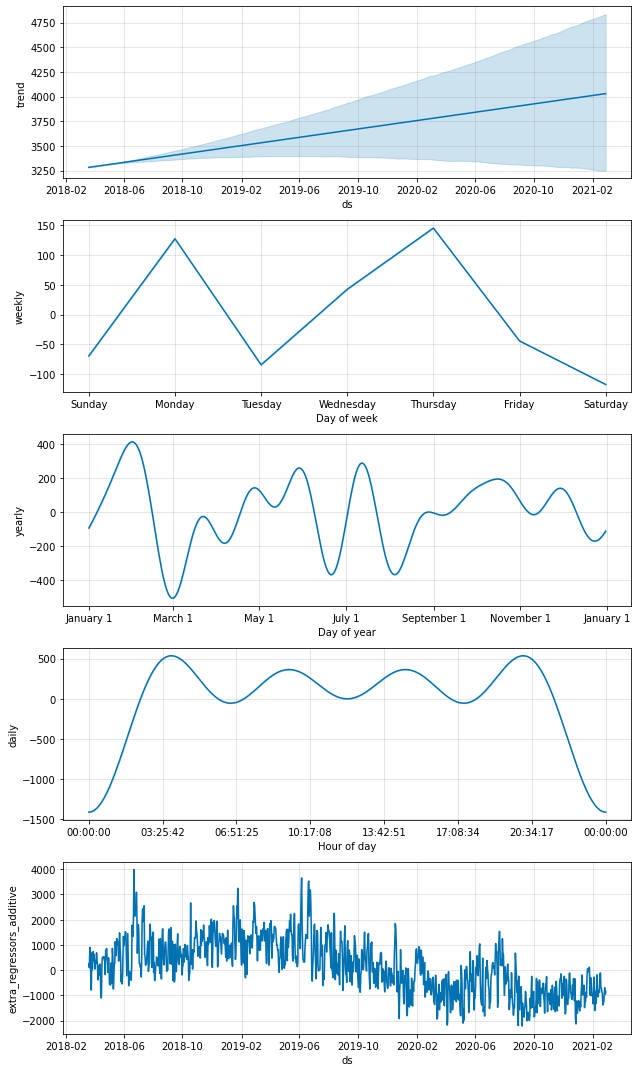

In [234]:
model.plot_components(forecast_values_new)

Thursday has the highest value

#### Question 20:

Train a multivariate time series model performing the same train-test split as before, but now exclude T-max from the training data(drop T-max),

What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set

In [235]:
#We drop add2 which we previously renamed from Tmaxs
daily_elect_data_mod2 = daily_elect_data_mod.drop("add2", axis = 1, inplace=False)

In [236]:
train_data_new2 = daily_elect_data_mod2.iloc[:2757,:]
test_data_new2 = daily_elect_data_mod2.iloc[2757:,:]

model = Prophet(daily_seasonality=True)

model.add_regressor('add1')
model.add_regressor('add3')

In [237]:
model = model.fit(train_data_new2)

In [238]:
forecast_values_new2 = model.predict(test_data_new2) 
forecast_values_new2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add3,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,3261.855624,-255.152975,4265.842293,3261.855624,3261.855624,-855.330389,-855.330389,-855.330389,1101.266312,...,-84.189849,-84.189849,-84.189849,-38.661722,-38.661722,-38.661722,0.0,0.0,0.0,1990.771007
1,2018-03-21,3262.550415,-203.516508,4302.622360,3262.550415,3262.550415,-1025.135452,-1025.135452,-1025.135452,1125.736663,...,42.705804,42.705804,42.705804,-29.357148,-29.357148,-29.357148,0.0,0.0,0.0,1982.331312
2,2018-03-22,3263.245205,692.317477,5072.811221,3263.245205,3263.245205,-214.695957,-214.695957,-214.695957,1125.736663,...,145.366763,145.366763,145.366763,-24.305132,-24.305132,-24.305132,0.0,0.0,0.0,2901.178572
3,2018-03-23,3263.939995,268.962876,4708.680087,3263.939995,3263.939995,-274.560922,-274.560922,-274.560922,1058.099908,...,-44.016978,-44.016978,-44.016978,-23.364983,-23.364983,-23.364983,0.0,0.0,0.0,2585.928050
4,2018-03-24,3264.634785,-746.189886,3563.186147,3264.634785,3264.634785,-1075.119456,-1075.119456,-1075.119456,787.728934,...,-117.919240,-117.919240,-117.919240,-26.286721,-26.286721,-26.286721,0.0,0.0,0.0,1438.869331


In [239]:
mape_new2 = mape_value(test_data_new2['y'],forecast_values_new2['yhat'])
print("mean absolute percentage error when Tmax is dropped is : ", round(mape_new2,2))

mean absolute percentage error when Tmax is dropped is :  233.38
